In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

In [2]:
df2=pd.read_csv(r"C:\Users\Lenovo\Desktop\UIDAI_Data_Hackathon_2026\data\combined\combined_aadhar_demographic.csv")

In [3]:
df2.head()


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [5]:
df2.describe()

,pincode,demo_age_5_17,demo_age_17_
count,2.071700e+06,2.071700e+06,2.071700e+06
mean,5.278318e+05,2.347552e+00,2.144701e+01
std,1.972933e+05,1.490355e+01,1.252498e+02
min,1.000000e+05,0.000000e+00,0.000000e+00
25%,3.964690e+05,0.000000e+00,2.000000e+00
50%,5.243220e+05,1.000000e+00,6.000000e+00
75%,6.955070e+05,2.000000e+00,1.500000e+01
max,8.554560e+05,2.690000e+03,1.616600e+04


In [6]:
df2.describe(include='all')


,date,state,district,pincode,demo_age_5_17,demo_age_17_
count,2071700,2071700,2071700,2.071700e+06,2.071700e+06,2.071700e+06
unique,95,65,983,NaN,NaN,NaN
top,12-12-2025,Andhra Pradesh,North 24 Parganas,NaN,NaN,NaN
freq,34568,207687,12994,NaN,NaN,NaN
mean,NaN,NaN,NaN,5.278318e+05,2.347552e+00,2.144701e+01
std,NaN,NaN,NaN,1.972933e+05,1.490355e+01,1.252498e+02
min,NaN,NaN,NaN,1.000000e+05,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,3.964690e+05,0.000000e+00,2.000000e+00
50%,NaN,NaN,NaN,5.243220e+05,1.000000e+00,6.000000e+00
75%,NaN,NaN,NaN,6.955070e+05,2.000000e+00,1.500000e+01


In [7]:
df2.isnull().sum() 

date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

In [8]:
df2.duplicated().sum()

np.int64(473601)

In [9]:
df2 = df2.drop_duplicates()


In [10]:
df2.duplicated().sum()

np.int64(0)

In [11]:
df2 = df2.drop_duplicates()


In [12]:
df2['date'] = pd.to_datetime(df2['date'], errors='coerce')

In [13]:
df2["date"]

0         2025-01-03
1         2025-01-03
2         2025-01-03
3         2025-01-03
4         2025-01-03
             ...    
2061695          NaT
2061696          NaT
2061697          NaT
2061698          NaT
2061699          NaT
Name: date, Length: 1598099, dtype: datetime64[ns]

In [14]:
df2['date'].isna().sum()


np.int64(921732)

In [15]:
nat_count = df2['date'].isna().sum()
total = len(df2)

nat_count, nat_count / total * 100

(np.int64(921732), np.float64(57.67677722093563))

🔴 45.8% of rows do NOT have valid dates

In [16]:
df2[['demo_age_5_17', 'demo_age_17_']].describe()


,demo_age_5_17,demo_age_17_
count,1.598099e+06,1.598099e+06
mean,2.251260e+00,2.064942e+01
std,1.391927e+01,1.177073e+02
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.000000e+00
50%,1.000000e+00,6.000000e+00
75%,2.000000e+00,1.500000e+01
max,2.690000e+03,1.616600e+04


In [17]:
df2['demo_age_5_17'].skew()



np.float64(44.858430600287434)

In [18]:
df2['demo_age_17_'].skew()

np.float64(36.47267227389654)

In [19]:
import numpy as np

df2 = df2.copy()

df2['state'] = (
    df2['state']
    .astype(str)              # force string
    .str.strip()              # remove leading/trailing spaces
    .str.lower()              # convert to lowercase
)

# remove rows where state is purely numeric (e.g. '100000')
df2.loc[df2['state'].str.fullmatch(r'\d+'), 'state'] = np.nan

In [20]:
df2["state"].unique()

array(['uttar pradesh', 'andhra pradesh', 'gujarat', 'rajasthan',
       'karnataka', 'west bengal', 'telangana', 'odisha', 'maharashtra',
       'kerala', 'bihar', 'tamil nadu', 'madhya pradesh', 'assam',
       'tripura', 'arunachal pradesh', 'punjab', 'jharkhand', 'delhi',
       'chandigarh', 'chhattisgarh', 'jammu and kashmir', 'mizoram',
       'nagaland', 'himachal pradesh', 'goa', 'haryana', 'meghalaya',
       'uttarakhand', 'manipur', 'daman and diu', 'puducherry', 'sikkim',
       'ladakh', 'dadra and nagar haveli and daman and diu',
       'dadra and nagar haveli', 'orissa', 'pondicherry',
       'andaman & nicobar islands', 'andaman and nicobar islands',
       'daman & diu', 'west  bengal', 'jammu & kashmir', 'lakshadweep',
       'dadra & nagar haveli', 'westbengal', 'west bangal', 'chhatisgarh',
       'west bengli', 'darbhanga', 'puttenahalli', 'uttaranchal',
       'balanagar', 'jaipur', 'madanapalle', nan, 'nagpur',
       'raja annamalai puram'], dtype=object)

In [21]:
df2 = df2.dropna(subset=['state'])


In [22]:
OFFICIAL_STATES = {
    'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chhattisgarh',
    'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jharkhand',
    'karnataka', 'kerala', 'madhya pradesh', 'maharashtra',
    'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha',
    'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana',
    'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal',

    # Union Territories
    'andaman and nicobar islands', 'chandigarh', 'dadra and nagar haveli and daman and diu',
    'delhi', 'jammu and kashmir', 'ladakh', 'lakshadweep', 'puducherry'
}

In [23]:
STATE_CORRECTIONS = {
    'orissa': 'odisha',
    'uttaranchal': 'uttarakhand',
    'pondicherry': 'puducherry',

    'jammu & kashmir': 'jammu and kashmir',
    'andaman & nicobar islands': 'andaman and nicobar islands',

    'dadra and nagar haveli': 'dadra and nagar haveli and daman and diu',
    'daman and diu': 'dadra and nagar haveli and daman and diu',
    'dadra & nagar haveli': 'dadra and nagar haveli and daman and diu',
    'daman & diu': 'dadra and nagar haveli and daman and diu',

    'westbengal': 'west bengal',
    'west bangal': 'west bengal',
    'west bengli': 'west bengal',

    'chhatisgarh': 'chhattisgarh'
}

In [24]:
df2['state_clean'] = (
    df2['state']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace('&', 'and')
    .str.replace(r'\s+', ' ', regex=True)
)

In [25]:
df2['state_clean'] = df2['state_clean'].replace(STATE_CORRECTIONS)


In [26]:
df2['district'] = (
    df2['district']
    .str.lower()
    .str.strip()
    .str.replace(r'\(.*\)', '', regex=True)
)


In [27]:
df2

,date,state,district,pincode,demo_age_5_17,demo_age_17_,state_clean
0,2025-01-03,uttar pradesh,gorakhpur,273213,49,529,uttar pradesh
1,2025-01-03,andhra pradesh,chittoor,517132,22,375,andhra pradesh
2,2025-01-03,gujarat,rajkot,360006,65,765,gujarat
3,2025-01-03,andhra pradesh,srikakulam,532484,24,314,andhra pradesh
4,2025-01-03,rajasthan,udaipur,313801,45,785,rajasthan
...,...,...,...,...,...,...,...
2061695,NaT,uttar pradesh,ayodhya,224195,0,1,uttar pradesh
2061696,NaT,uttar pradesh,ayodhya,224206,0,2,uttar pradesh
2061697,NaT,uttar pradesh,ayodhya,224208,0,2,uttar pradesh
2061698,NaT,uttar pradesh,ayodhya,224234,0,1,uttar pradesh


In [30]:
df2[['state','district']].nunique()



state        57
district    955
dtype: int64

In [31]:
df2['is_numeric_state'] = df2['state_clean'].str.fullmatch(r'\d+')
df2['is_valid_state'] = df2['state_clean'].isin(OFFICIAL_STATES)

In [32]:
df2['state_final'] = np.where(
    df2['is_valid_state'] & ~df2['is_numeric_state'],
    df2['state_clean'],
    np.nan
)

In [33]:
df2 = df2.dropna(subset=['state_final'])


In [34]:
df2['state'] = df2['state_final']
df2 = df2.drop(columns=['state_clean', 'state_final', 'is_numeric_state', 'is_valid_state'])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19488\1763443681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['state'] = df2['state_final']


In [35]:
print(sorted(df2['state'].unique()))

['andaman and nicobar islands', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'dadra and nagar haveli and daman and diu', 'delhi', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jammu and kashmir', 'jharkhand', 'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana', 'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']


In [36]:
df2.state.nunique()

36

df2

In [ ]:
df2["state"].nunique()

36

In [ ]:
# Ensure pincode is 6 digits
df2['pincode'] = df2['pincode'].astype(str)

df2['invalid_pincode'] = ~df2['pincode'].str.match(r'^\d{6}$')

# Count invalids
df2['invalid_pincode'].value_counts()


invalid_pincode
False    1598090
Name: count, dtype: int64

In [ ]:
df2 = df2[~df2['invalid_pincode']]
df2['pincode'] = df2['pincode'].astype(int)

In [ ]:
df2['total_demo'] = df2['demo_age_5_17'] + df2['demo_age_17_']


In [ ]:
df2['child_to_adult_ratio'] = np.where(
    df2['demo_age_17_'] > 0,
    df2['demo_age_5_17'] / df2['demo_age_17_'],
    np.nan
)


In [ ]:
df2

,date,state,district,pincode,demo_age_5_17,demo_age_17_,district_clean,invalid_pincode,total_demo,child_to_adult_ratio
0,2025-01-03,uttar pradesh,Gorakhpur,273213,49,529,gorakhpur,False,578,0.092628
1,2025-01-03,andhra pradesh,Chittoor,517132,22,375,chittoor,False,397,0.058667
2,2025-01-03,gujarat,Rajkot,360006,65,765,rajkot,False,830,0.084967
3,2025-01-03,andhra pradesh,Srikakulam,532484,24,314,srikakulam,False,338,0.076433
4,2025-01-03,rajasthan,Udaipur,313801,45,785,udaipur,False,830,0.057325
...,...,...,...,...,...,...,...,...,...,...
2061695,NaT,uttar pradesh,Ayodhya,224195,0,1,ayodhya,False,1,0.000000
2061696,NaT,uttar pradesh,Ayodhya,224206,0,2,ayodhya,False,2,0.000000
2061697,NaT,uttar pradesh,Ayodhya,224208,0,2,ayodhya,False,2,0.000000
2061698,NaT,uttar pradesh,Ayodhya,224234,0,1,ayodhya,False,1,0.000000


In [ ]:
df2['child_ratio'] = np.where(
    df2['total_demo'] > 0,
    df2['demo_age_5_17'] / df2['total_demo'],
    np.nan
)


In [ ]:
df2

,date,state,district,pincode,demo_age_5_17,demo_age_17_,district_clean,invalid_pincode,total_demo,child_to_adult_ratio,child_ratio
0,2025-01-03,uttar pradesh,Gorakhpur,273213,49,529,gorakhpur,False,578,0.092628,0.084775
1,2025-01-03,andhra pradesh,Chittoor,517132,22,375,chittoor,False,397,0.058667,0.055416
2,2025-01-03,gujarat,Rajkot,360006,65,765,rajkot,False,830,0.084967,0.078313
3,2025-01-03,andhra pradesh,Srikakulam,532484,24,314,srikakulam,False,338,0.076433,0.071006
4,2025-01-03,rajasthan,Udaipur,313801,45,785,udaipur,False,830,0.057325,0.054217
...,...,...,...,...,...,...,...,...,...,...,...
2061695,NaT,uttar pradesh,Ayodhya,224195,0,1,ayodhya,False,1,0.000000,0.000000
2061696,NaT,uttar pradesh,Ayodhya,224206,0,2,ayodhya,False,2,0.000000,0.000000
2061697,NaT,uttar pradesh,Ayodhya,224208,0,2,ayodhya,False,2,0.000000,0.000000
2061698,NaT,uttar pradesh,Ayodhya,224234,0,1,ayodhya,False,1,0.000000,0.000000


In [ ]:
state_summary = (
    df2.groupby('state')
    .agg(
        pincodes=('pincode', 'nunique'),
        total_child=('demo_age_5_17', 'sum'),
        total_adult=('demo_age_17_', 'sum'),
        total_enrolment=('total_demo', 'sum')
    )
    .assign(
        child_ratio=lambda x: x['total_child'] / x['total_adult'],
        child_share=lambda x: x['total_child'] / x['total_enrolment']
    )
    .sort_values('total_enrolment', ascending=False)
)

state_summary.head()


,pincodes,total_child,total_adult,total_enrolment,child_ratio,child_share
state,,,,,,
uttar pradesh,1760,603453,5857058,6460511,0.103030,0.093406
maharashtra,1609,204293,3620598,3824891,0.056425,0.053411
bihar,921,285883,3352961,3638844,0.085263,0.078564
west bengal,1364,177260,2667088,2844348,0.066462,0.062320
madhya pradesh,796,289711,1814924,2104635,0.159627,0.137654


In [ ]:
district_summary = (
    df2.groupby(['state', 'district'])
    .agg(
        pincodes=('pincode', 'nunique'),
        total_child=('demo_age_5_17', 'sum'),
        total_adult=('demo_age_17_', 'sum'),
        total_enrolment=('total_demo', 'sum')
    )
    .assign(
        child_ratio=lambda x: x['total_child'] / x['total_adult']
    )
    .reset_index()
)


In [ ]:
district_summary.sort_values('total_enrolment', ascending=False).head(10)


,state,district,pincodes,total_child,total_adult,total_enrolment,child_ratio
541,maharashtra,Thane,96,25933,300816,326749,0.086209
532,maharashtra,Pune,152,24139,301944,326083,0.079945
983,west bengal,South 24 Parganas,95,20655,279450,300105,0.073913
968,west bengal,Murshidabad,100,21879,241150,263029,0.090728
257,gujarat,Surat,88,25207,232030,257237,0.108637
369,karnataka,Bengaluru,128,27746,193576,221322,0.143334
214,delhi,North West Delhi,18,27972,189933,217905,0.147273
972,west bengal,North 24 Parganas,152,10855,199259,210114,0.054477
540,maharashtra,Solapur,71,5877,194089,199966,0.030280
226,gujarat,Ahmedabad,88,23666,174573,198239,0.135565


In [ ]:
adult_heavy = df2[
    (df2['demo_age_17_'] > 500) &
    (df2['child_ratio'] < 0.05)
]

adult_heavy[['state', 'district', 'pincode', 'demo_age_17_', 'child_ratio']].head(15)

,state,district,pincode,demo_age_17_,child_ratio
13,rajasthan,Ganganagar,335027,545,0.043860
29,maharashtra,Jalgaon,425310,685,0.041958
30,tripura,Dhalai,799285,517,0.033645
37,rajasthan,Churu,331301,700,0.030471
62,jharkhand,Giridih,825320,2931,0.032354
75,rajasthan,Jodhpur,345021,735,0.047927
81,tamil nadu,Cuddalore,607103,520,0.018868
97,jharkhand,Dhanbad,828203,1200,0.028340
101,uttar pradesh,Bara Banki,225201,680,0.043601
104,west bengal,South 24 Parganas,743337,1822,0.047071


In [ ]:
child_heavy = df2[
    (df2['demo_age_5_17'] > 100) &
    (df2['child_ratio'] > 0.4)
]

child_heavy[['state', 'district', 'pincode', 'demo_age_5_17', 'child_ratio']].head(15)

,state,district,pincode,demo_age_5_17,child_ratio
204,karnataka,Vijayapura,586125,267,0.712000
235,karnataka,Belagavi,591317,187,0.489529
533,karnataka,Gadag,582205,150,0.461538
855,karnataka,Bijapur,586125,126,0.506024
904,karnataka,Vijayapura,586217,143,0.501754
1199,madhya pradesh,Chhindwara,480111,306,0.439024
1527,madhya pradesh,Chhindwara,480111,242,0.444853
1664,karnataka,Haveri,581104,550,0.631458
1756,karnataka,Vijayapura,586112,259,0.660714
1911,karnataka,Bagalkot,587118,325,0.555556


In [ ]:
pincode_district_conflict = (
    df2.groupby('pincode')['district']
    .nunique()
    .reset_index(name='district_count')
    .query('district_count > 1')
)

pincode_district_conflict.head()


,pincode,district_count
0,110001,2
2,110003,2
10,110011,2
15,110016,2
20,110021,2


In [ ]:
district_state_conflict = (
    df2.groupby('district')['state']
    .nunique()
    .reset_index(name='state_count')
    .query('state_count > 1')
)

district_state_conflict.head(15)



,district,state_count
2,Adilabad,2
47,Aurangabad,2
73,Balrampur,2
131,Bijapur,2
135,Bilaspur,2
323,Hamirpur,2
352,Hyderabad,2
405,K.v. Rangareddy,2
437,Kargil,2
440,Karimnagar,2


In [ ]:
Q1 = df2['total_demo'].quantile(0.25)
Q3 = df2['total_demo'].quantile(0.75)
IQR = Q3 - Q1

df2['enrolment_outlier'] = (
    (df2['total_demo'] < (Q1 - 1.5 * IQR)) |
    (df2['total_demo'] > (Q3 + 1.5 * IQR))
)

df2[df2['enrolment_outlier']].head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_,district_clean,invalid_pincode,total_demo,child_to_adult_ratio,child_ratio,enrolment_outlier
0,2025-01-03,uttar pradesh,Gorakhpur,273213,49,529,gorakhpur,False,578,0.092628,0.084775,True
1,2025-01-03,andhra pradesh,Chittoor,517132,22,375,chittoor,False,397,0.058667,0.055416,True
2,2025-01-03,gujarat,Rajkot,360006,65,765,rajkot,False,830,0.084967,0.078313,True
3,2025-01-03,andhra pradesh,Srikakulam,532484,24,314,srikakulam,False,338,0.076433,0.071006,True
4,2025-01-03,rajasthan,Udaipur,313801,45,785,udaipur,False,830,0.057325,0.054217,True


In [ ]:
df2.shape

(1598090, 12)

In [ ]:
elite_view = (
    df2.groupby(['state', 'district'])
    .agg(
        total_enrolment=('total_demo', 'sum'),
        avg_child_share=('child_ratio', 'mean'),
        max_pincode_enrolment=('total_demo', 'max')
    )
    .reset_index()
    .sort_values('total_enrolment', ascending=False)
)

elite_view.head(10)


,state,district,total_enrolment,avg_child_share,max_pincode_enrolment
541,maharashtra,Thane,326749,0.057186,6231
532,maharashtra,Pune,326083,0.074037,2390
983,west bengal,South 24 Parganas,300105,0.068382,3944
968,west bengal,Murshidabad,263029,0.084326,4510
257,gujarat,Surat,257237,0.098940,7099
369,karnataka,Bengaluru,221322,0.114436,2106
214,delhi,North West Delhi,217905,0.113365,13071
972,west bengal,North 24 Parganas,210114,0.050026,1980
540,maharashtra,Solapur,199966,0.054690,3079
226,gujarat,Ahmedabad,198239,0.107512,3240


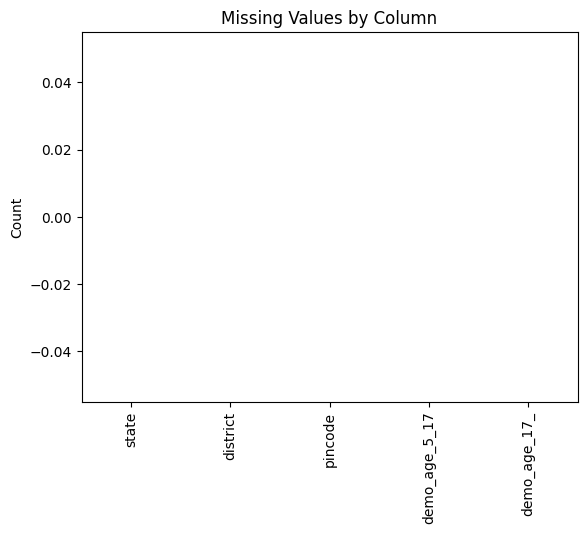

In [ ]:
import matplotlib.pyplot as plt

df2[['state','district','pincode','demo_age_5_17','demo_age_17_']].isna().sum().plot(kind='bar')
plt.title('Missing Values by Column')
plt.ylabel('Count')
plt.show()


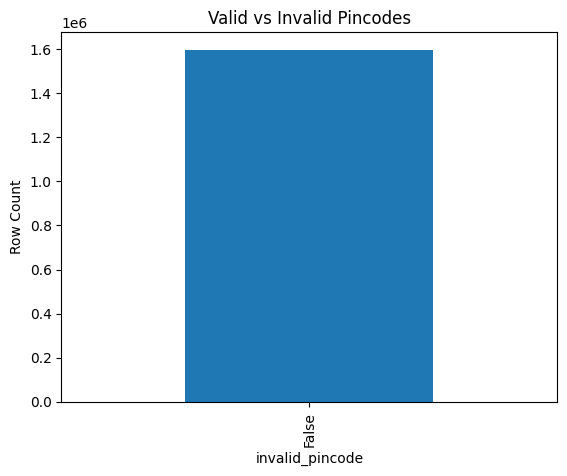

In [ ]:
df2['invalid_pincode'].value_counts().plot(kind='bar')
plt.title('Valid vs Invalid Pincodes')
plt.ylabel('Row Count')
plt.show()


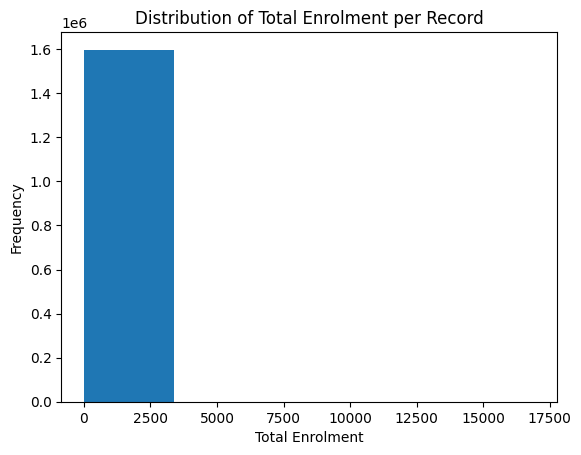

In [ ]:
plt.hist(df2['total_demo'], bins=5)
plt.title('Distribution of Total Enrolment per Record')
plt.xlabel('Total Enrolment')
plt.ylabel('Frequency')
plt.show()


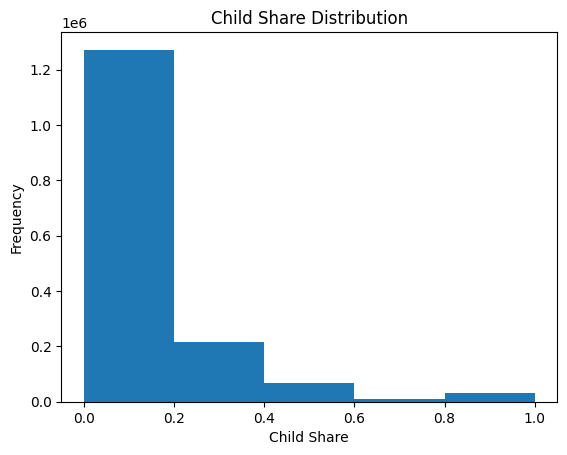

In [ ]:
plt.hist(df2['child_ratio'].dropna(), bins=5)
plt.title('Child Share Distribution')
plt.xlabel('Child Share')
plt.ylabel('Frequency')
plt.show()


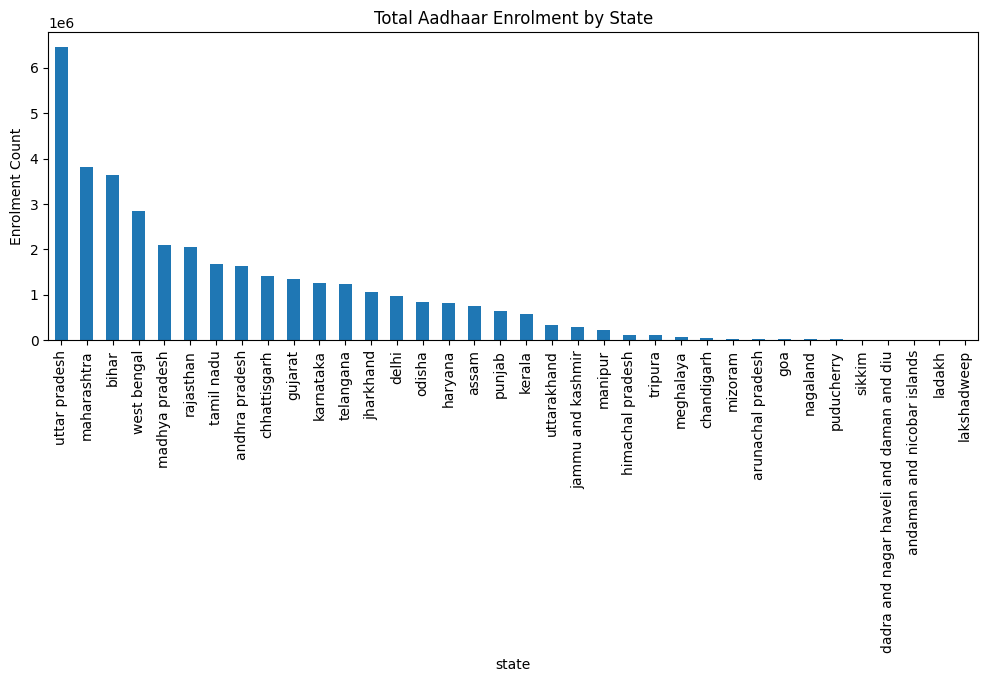

In [ ]:
state_summary['total_enrolment'].plot(kind='bar', figsize=(12,4))
plt.title('Total Aadhaar Enrolment by State')
plt.ylabel('Enrolment Count')
plt.show()


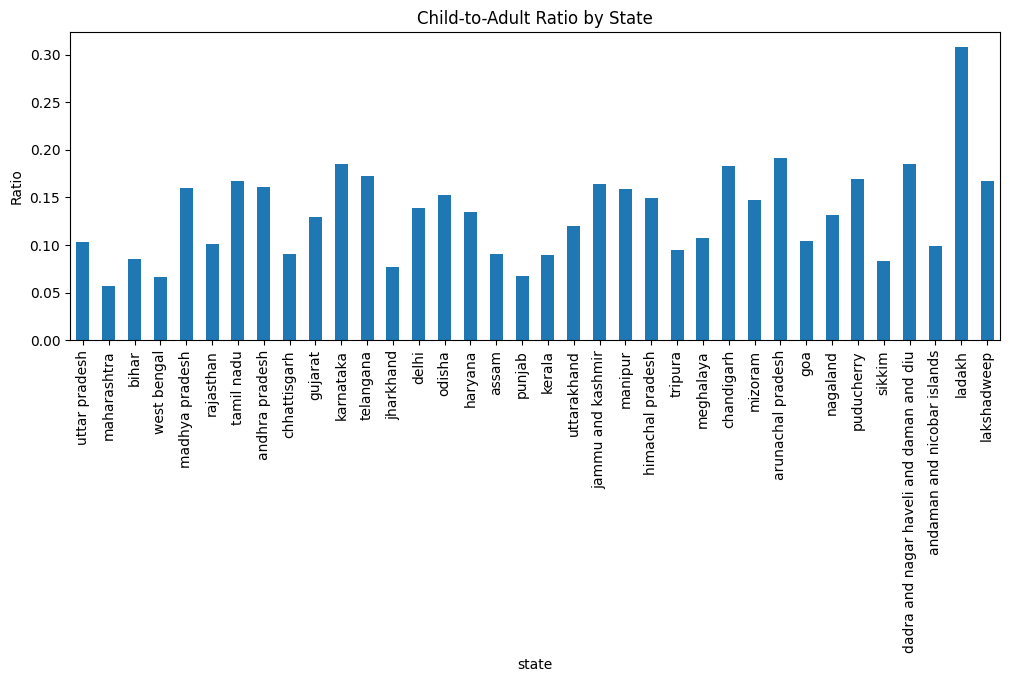

In [ ]:
state_summary['child_ratio'].plot(kind='bar', figsize=(12,4))
plt.title('Child-to-Adult Ratio by State')
plt.ylabel('Ratio')
plt.show()


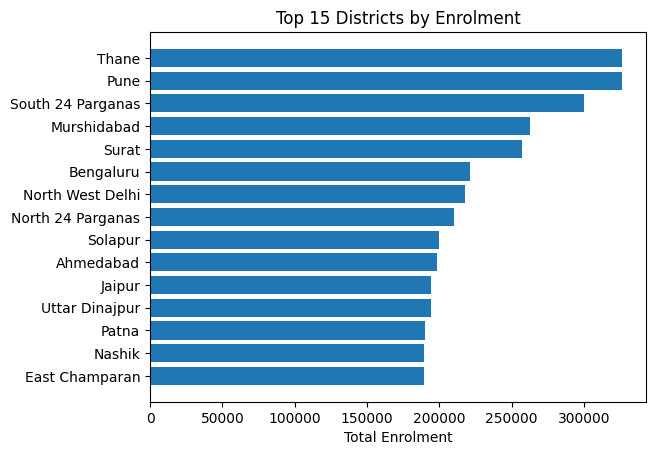

In [ ]:
top_districts = district_summary.sort_values(
    'total_enrolment', ascending=False
).head(15)

plt.barh(top_districts['district'], top_districts['total_enrolment'])
plt.title('Top 15 Districts by Enrolment')
plt.xlabel('Total Enrolment')
plt.gca().invert_yaxis()
plt.show()


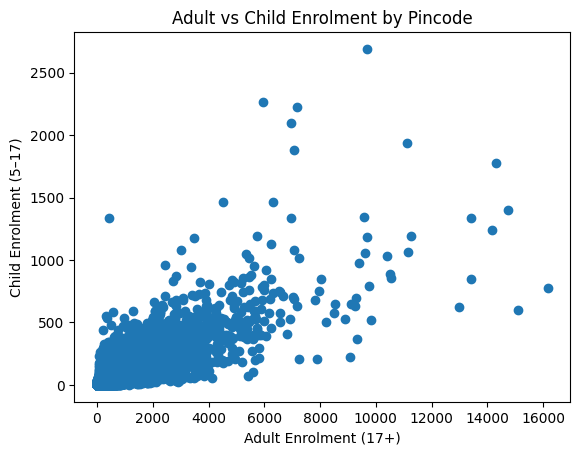

In [ ]:
plt.scatter(
    df2['demo_age_17_'],
    df2['demo_age_5_17']
)
plt.xlabel('Adult Enrolment (17+)')
plt.ylabel('Child Enrolment (5–17)')
plt.title('Adult vs Child Enrolment by Pincode')
plt.show()


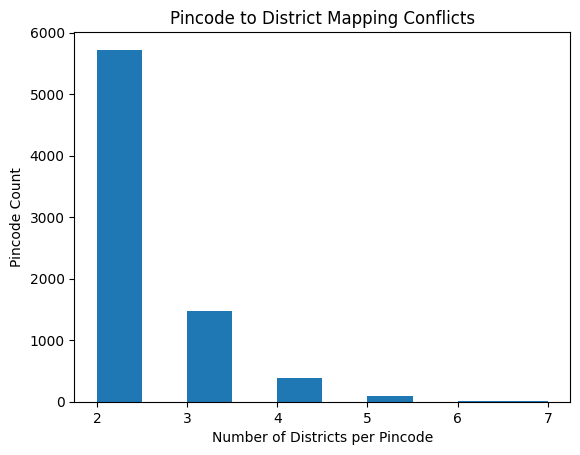

In [ ]:
plt.hist(pincode_district_conflict['district_count'], bins=10)
plt.title('Pincode to District Mapping Conflicts')
plt.xlabel('Number of Districts per Pincode')
plt.ylabel('Pincode Count')
plt.show()


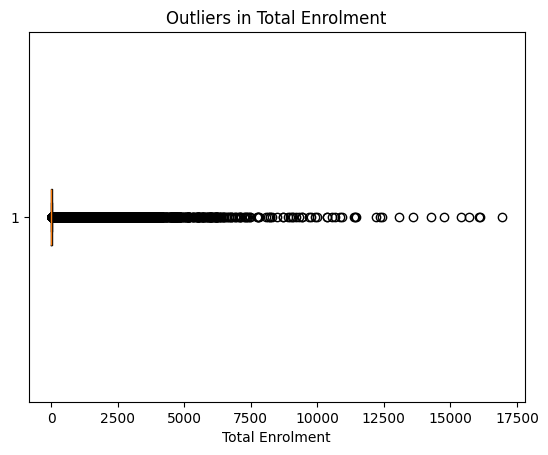

In [ ]:
plt.boxplot(df2['total_demo'].dropna(), vert=False)
plt.title('Outliers in Total Enrolment')
plt.xlabel('Total Enrolment')
plt.show()


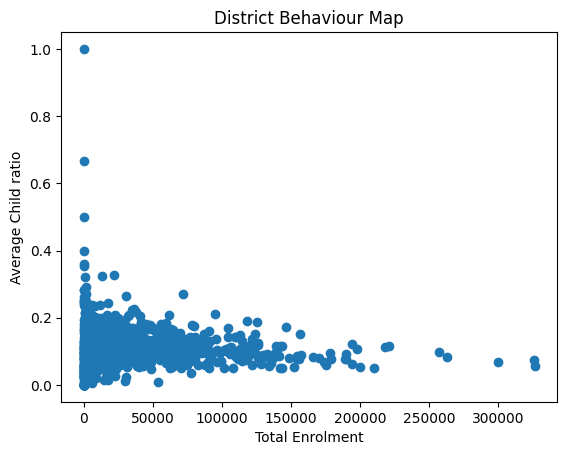

In [ ]:
plt.scatter(
    elite_view['total_enrolment'],
    elite_view['avg_child_share']
)
plt.xlabel('Total Enrolment')
plt.ylabel('Average Child ratio')
plt.title('District Behaviour Map')
plt.show()


In [ ]:
df2["state"].nunique()

36